In [ ]:
import pandas as pd
import os
import numpy as np
import timeit


import warnings
warnings.filterwarnings(action='ignore')


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rc('font', family='Malgun Gothic') #한글 폰트 지정

os.getcwd()

#한글 폰트 사용

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]

plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
- 인벤 데이터
- 포지션 데이터

In [ ]:
file = pd.read_csv('./fifa_inven.csv', encoding='cp949')
position = pd.read_csv('./position.csv')

In [ ]:
file.head()

In [ ]:
position.head()

In [ ]:
print('총 데이터 수 :',file.shape)   #총 데이터 수 : 362432개

## 선수 데이터 + position_image 데이터 병합

- 최종 데이터 형태

In [ ]:
df = pd.merge(file, position, on='position_image')
df.head()

In [ ]:
#결측치 제거
df.isnull().sum()   # 열별 nan 데이터 갯수 확인
df = df.dropna(axis=0)

#position_image 컬럼 제거
df.drop(['position_image'], axis=1, inplace=True)
df.head()

In [ ]:
#최종 데이터 개수

print('최종 데이터 수 :', df.shape[0])

### comment 컬럼 형태 확인

In [ ]:
df['comment'][1]

## --------------------------------------------------

# EDA 및 시각화

In [ ]:
# 선수 별 언급 횟수
df.groupby(['name']).count()['comment'].sort_values(ascending=False).hist(bins=50, density = True)

plt.title('선수 별 언급 횟수에 따른 분포', fontsize=15)
plt.xlabel('언급 횟수')

plt.show()

- 대부분의 선수의 언급 횟수가 0에 가까운 분포를 보임
- 즉, 특정 선수들만 많이 언급하는 현상을 보임

In [ ]:
# 전체 선수 몇명?
print('전체 선수 :', len(df['name'].unique()),'명')

In [ ]:
#선수 한명 당 언급 횟수 위한 dataframe 생성
#count기반 / percentage 기반

name_count = df['name'].value_counts(sort=True)   #선수 1명 당 언급 횟수
name_count = name_count.rename_axis('name').reset_index(name='counts')   #선수 언급 횟수 count 변수로 생성(dataframe 형태)
name_count['per'] = name_count['counts'] / len(df) * 100   #선수별 언급 비율(특정 선수 언급 횟수 / 전체 언급
# name_count = name_count[:12]    #상위 n명 선수만 뽑기


### 선수 언급 count

In [ ]:
# #선수 한명 당 언급 횟수
# #count기반 / percentage 기반

# # name_count = df['name'].value_counts(sort=True)   #선수 1명 당 언급 횟수
# # name_count = name_count.rename_axis('name').reset_index(name='counts')   #선수 언급 횟수 count 변수로 생성(dataframe 형태)
# # name_count['per'] = name_count['counts'] / len(df) * 100   #선수별 언급 비율(특정 선수 언급 횟수 / 전체 언급 수)
# # name_count = name_count[:12]    #상위 n명 선수만 뽑기



# #plot

# fig, ax = plt.subplots(2, 1, figsize=(16,20))

# sns.barplot(x = 'name', y = 'counts', data = name_count, ax=ax[0])
# sns.barplot(x = 'name', y = 'per', data = name_count, ax=ax[1])

# ax[0].set_title('선수별 분포(Counts 기반)', fontdict={'fontsize':25})
# ax[1].set_title('선수별 분포(Proportion 기반)', fontdict={'fontsize':25})

# plt.rcParams['font.family'] = 'Malgun Gothic'  #font 설정
# plt.rc('axes', labelsize=20)

# plt.show()

In [ ]:
#선수 별 언급 count 및 percentage를 DataFrame 형태로 만드는 함수 

def make_count_df(n):
    name_count = df['name'].value_counts(sort=True)   #선수 1명 당 언급 횟수
    name_count = name_count.rename_axis('name').reset_index(name='counts')   #선수 언급 횟수 count 변수로 생성(dataframe 형태)
    name_count['per'] = name_count['counts'] / len(df) * 100   #선수별 언급 비율(특정 선수 언급 횟수 / 전체 언급 수)
    name_count = name_count[:n]    #상위 n명 선수만 뽑기
    
    return name_count


In [ ]:
# 선수별 count & percentage 순위대로 plot하는 함수

def plot_make_count_df(n):
    fig, ax = plt.subplots(2, 1, figsize=(16,20))

    sns.barplot(x = 'name', y = 'counts', data = make_count_df(n), ax=ax[0])
    sns.barplot(x = 'name', y = 'per', data = make_count_df(n), ax=ax[1])

    ax[0].set_title('선수별 분포(Counts 기반)', fontdict={'fontsize':25})
    ax[1].set_title('선수별 분포(Proportion 기반)', fontdict={'fontsize':25})

    plt.rcParams['font.family'] = 'Malgun Gothic'  #font 설정
    plt.rc('axes', labelsize=20)

    plt.show()
    


In [ ]:
#언급률이 상위 limiet_per(%)가 되면 그때의 선수까지 출력하는 함수 
#name_count 데이터 활용 -> data


def per_sum(data, limit_per):   #data : 4023명의 선수들이 들어가있는 dataframe, 
                                # limit_per : per의 합이 X%가 될 때 멈춤
    for i in range(len(data)):
        per_sum_name_count = data.iloc[:i+1]
        
        if (per_sum_name_count['per'].sum() > limit_per) == True:
            return per_sum_name_count

- '크리스티아누 호날두'의 언급 횟수가 20057회로 전체의 5.56%를 차지함
- 2순위 :  '메시' /8954회 /2.48%
- 3순위 : '호나우두' / 6627회 /  1.83%

### 언급률 하위 20%는 제외

In [ ]:
per_sum(name_count, 81)

- 1번째 선수 '크리스티아누 호날두' 부터 ~ 351번째 선수 '율리안 브란트' 까지만 사용함
- 352, 353, 354번째 선수인 지오구 달로, 데쿠, 히카르두 페레이라는 0.052106%로 동일해서 실행 마다 바뀌는 경우가 있어서 셋은 아예 제외하기로함
- 나머지 하위 선수는 언급율이 하의 20%에 속하므로 미미하다고 판단하여 제외

In [ ]:
new_name_count = name_count.iloc[:352]
new_name_count

### 353명의 선수만 원본 dataframe에서 추출

In [ ]:
#추출된 353명의 선수 list 생성
extracted_player_list = []    #추출 선수 리스트 만들기

for i in new_name_count['name']:    #추출된 선수 list에 한명씩 추가
    extracted_player_list.append(i)  
print(extracted_player_list)

In [ ]:
#추출된 선수 list 내에 있는 선수만 처음 dataframe(df)에서 추출

extracted_df = df[df['name'].isin(extracted_player_list)].reset_index()
extracted_df.drop(['index'], axis=1, inplace=True)
extracted_df.head()


In [ ]:
extracted_df.shape

## 데이터 저장

In [ ]:
# # extracted_df 데이터 csv파일로 저장

# import pandas as pd
# extracted_df.to_csv('extracted_df.csv', encoding='cp949')

- 최종적으로 선정된 353명의 선수
- 288490개의 data

## 추출된 데이터 내 position 별 선수 비율

In [ ]:
#position 별 count & percentage

position_count = extracted_df.groupby(['position'])['name'].count().sort_values(ascending=False).rename_axis('position').reset_index(name='counts')
position_count['per'] = position_count['counts'] / len(extracted_df) * 100
position_count

In [ ]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(6,6))
plt.pie(position_count['per'], labels = position_count['position'], autopct = '%.1f%%',
       shadow = False, colors=colors, wedgeprops=wedgeprops)
plt.show()

- FW : 46.6%로 가장 많은 비율
- 2순위 : MF(28.5%)
- 3순위 : DF(20.2%)
- 4순위 : GK(4.7%)

### 추출된 데이터 내 dtl_position 별 선수 비율

In [ ]:
dtl_position_count = extracted_df.groupby(['dtl_position'])['name'].count().sort_values(ascending=False).rename_axis('dtl_position').reset_index(name='counts')
dtl_position_count['per'] = dtl_position_count['counts'] / len(extracted_df) * 100
dtl_position_count

In [ ]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(6,6))
plt.pie(dtl_position_count['per'], labels = dtl_position_count['dtl_position'], autopct = '%.1f%%',
       shadow = False, wedgeprops=wedgeprops)
plt.show()

- ST position이 28.3%로 가장 높음
- 2순위 : CM(13.3%)
- 3순위 : CB(12.6%)
- 4순위 : CAM(6.6%)
- 5순위 : CF(6.6%)   => CAM보다 100회 정도 적음
- RWB와 LWB의 언급 횟수가 각각 119회와 147회로 굉장히 적음

### FW position의 dtl_position 비율 확인

In [ ]:
dtl_position_of_position = extracted_df[extracted_df['position'] == 'FW'].groupby(['dtl_position'])['name'].count().sort_values(ascending=False).rename_axis('dtl_position').reset_index(name='counts')
dtl_position_of_position['per'] = dtl_position_of_position['counts'] / len(extracted_df) * 100
dtl_position_of_position

In [ ]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.figure(figsize=(6,6))
plt.pie(dtl_position_of_position['per'], labels = dtl_position_of_position['dtl_position'], autopct = '%.1f%%',
       shadow = False, wedgeprops=wedgeprops, colors = colors)
plt.show()

- FW 포지션에서 세부포지션인 ST가 60.8%로 가장 높음
- 2순위 : CF(14.1%)
- 3순위 : LW(13.6%)
- 4순위 : RW(11.4%)
- ST를 제외한 나머지 포지션은 근소한 차이

# FW position에 대한 유저들의 평가는 어떤지??

### FW 선수들 score의 평균 점수

In [ ]:
#score 평균 상위 n명 선수 출력


FW_df = extracted_df[extracted_df['position']=='FW']
FW_avg_score = FW_df.groupby(['name']).mean().sort_values(ascending=False, by='score').rename_axis('name').reset_index()
FW_avg_score.tail()

### 평균 평점이 0점인 선수들 존재
- J.로드리게스, 티아고

In [ ]:
#J.로드리게스, 티아고의 comment 확인
zero_score_player_FW = ['J. 로드리게스', '티아고']

zero_player_df = extracted_df[extracted_df['name'].isin(zero_score_player_FW)]
zero_player_df.head()

In [ ]:
extracted_df[extracted_df['name'] == '티아고']['position'].value_counts()

In [ ]:
extracted_df[extracted_df['name'] == '티아고'].tail()

- 티아고의 경우 326개 데이터 중 1개의 데이터가 FW 포지션으로 평가함 -> 제거
- index : 166563

In [ ]:
#티아고의 경우 326개 데이터 중 1개만 ST 포지션으로 평가함 -> 제거
extracted_df = extracted_df.drop(extracted_df.index[166563])
extracted_df[extracted_df['name'] == '티아고'].tail()   #제거 확인

In [ ]:
extracted_df[extracted_df['name'] =='J. 로드리게스']['dtl_position'].value_counts()

In [ ]:
extracted_df[extracted_df['name'] == 'J. 로드리게스'].tail(8)

- J .로드리게스의 경우 6개가 ST, 1개가 GK 포지션으로 되어있음 -> 제거


In [ ]:
#조건 추출문으로 FW 포지션으로 등록되어있는 J .로드리게스 제거

hames_delete_df = extracted_df[(extracted_df['name'] == 'J. 로드리게스') & (extracted_df['position'] != 'MF')]
hames_delete_df

extracted_df = extracted_df.drop(hames_delete_df.index)

extracted_df[extracted_df['name'] == 'J. 로드리게스'].tail(8)

In [ ]:
extracted_df[extracted_df['name'] =='J. 로드리게스']['dtl_position'].value_counts()

# FW vs MF vs DF 포지션별 wordcloud 표현

- 한 선수가 여러 포지션에 등록되어 있는 경우가 많음
- 그 포지션에 맞는 comment를 달았을 것이라고 생각해서 따로 정제하지 않음
- 거래를 원하는 (ex:판다, 산다 등...) 의 comment는 제거해야 정확한 평가를 할 수 있다고 판단

In [1]:
import pandas as pd
extracted_df = pd.read_csv('extracted_df.csv', encoding='cp949')

In [2]:
#comment 데이터를 array 배열로 바꾸기

comment_data = extracted_df['comment'].values

comment_data

array(['5카쓰다가 적폐팀 다시짜면서 급여아끼려고 농협8카로 바꿧는데차이가 없음 ㅡㅡ 이미 충분한 적폐 급여 아까움',
       '진짜 신세계이긴 함. mmr로 난이도 올라가거나 컨디션 문제 아니면 진짜 미친놈. 200억을 넘어 250억을 향해 가는 그는 대체;;;',
       '무게중심이 너무 높다 안밀리고 덜밀리고를떠나서 휘청대면서 터치까지 길다 뮐러 할아버지와도 이건 못쓰겠어서 은카팔았다 12.3  ㅂ2ㅂ2',
       ..., '5카 현재 40만원 실축 포텐 엄청나고 인게임도 개빠릅니다 단점은 골결..',
       '예는 st로 쓰면 안되고 cam이나 cf로 써야됨. 졸라 내려오는 편이라 항상 역습때 아쉬움 . 하지만 체감이나 선수자체는 탑클래스',
       '클래식윙어라그런지 크로스는 호아킨과더불어원탑나머지는 그냥저냥 준수한편'], dtype=object)

In [4]:
#comment의 특수문자 제거
import re 
extracted_df['comment'] = extracted_df['comment'].apply(lambda x : re.sub('[-=+,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '',x))


In [5]:
#텍스트 정제(형태소 추출)
import konlpy

#형태로 추출
for i , document in enumerate(comment_data):
    okt = konlpy.tag.Okt()
    
    clean_words = []
    
    for word in okt.pos(document, stem=True):  #어간 추출
        if word[1] in ['Noun', 'Verb', 'Adjective']:  #명사, 동사, 형용사
            clean_words.append(word[0])
#     print(clean_words) #['카', '쓰다', '적폐팀', '다시', '짜다', '급여', '아끼다', '농협', '카', '바꿧', '늘다', '차이', '없다', '충분하다', '적폐', '급여', '아깝다', '움']
    
    document = ' '.join(clean_words)
#     print(document) #카 쓰다 적폐팀 다시 짜다 급여 아끼다 농협 카 바꿧 늘다 차이 없다 충분하다 적폐 급여 아깝다 움
    
    comment_data[i] = document
print(comment_data)#['카', '쓰다', '적폐팀', '다시', '짜다', '급여', '아끼다', '농협', '카', '바꿧', '늘다', '차이', '없다', '충분하다', '적폐', '급여', '아깝다', '움'] 카 쓰다 적폐팀 다시 짜다 급여 아끼다 농협 카 바꿧 늘다 차이 없다 충분하다 적폐 급여 아깝다 움 ['진짜', '신세계', '이기다', '함', '로', '난이도', '올라가다', '컨디션', '문제', '아니다', '진짜', '미치다', '놈', '넘다', '향', '하다', '가다', '그', '대체'] 진짜 신세계 이기다 함 로 난이도 올라가다 컨디션 문제 아니다 진짜 미치다 놈 넘다 향 하다 가다 그 대체

KeyboardInterrupt: 

In [ ]:
#불용어 제거

#불용어 사전 (stopword) 불러오기
with open('./koreanStopwords.txt', encoding= ' utf-8') as file:
    stop_words = list()
    
    for f in file:
        stop_words.append(f[:-1])   #\n 문자 제거
#     print(stop_words)


for i, document in enumerate(comment_data):
    clean_words = []
    for word in nltk.tokenize.word_tokenize(document):
        if word not in stop_words:  #불용어 제거
            clean_words.append(word)
    print(clean_words)  # ['카', '쓰다', '적폐팀', '짜다', '급여', '아끼다', '농협', '카', '바꿧', '늘다', '차이', '없다', '충분하다', '적폐', '급여', '아깝다', '움']
    comment_data[i] = ' '.join(clean_words)
print(comment_data) #['카', '쓰다', '적폐팀', '짜다', '급여', '아끼다', '농협', '카', '바꿧', '늘다', '차이', '없다', '충분하다', '적폐', '급여', '아깝다', '움'] ['진짜', '신세계', '이기다', '함', '난이도', '올라가다', '컨디션', '아니다', '진짜', '미치다', '놈', '넘다', '향', '하다', '가다', '대체']

## WordCloud

In [8]:
from konlpy.tag import Okt
from collections import Counter

file = open('comment.txt', 'r', encoding='utf-8')
lists = file.readlines()
file.close()


In [14]:
import timeit

start = timeit.default_timer()

okt = Okt() 
morphs = []
for sentence in lists: 
    morphs.append(okt.pos(sentence))

print(morphs)

end = timeit.default_timer()
(end - start)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6765.473187

In [15]:
noun_adj_adv_list=[]
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun', 'Verb', 'Adjective']:
            noun_adj_adv_list.append(word)

print(noun_adj_adv_list)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
noun_adj_adv_list

['카',
 '쓰다가',
 '적폐팀',
 '다시',
 '짜면서',
 '급여',
 '아끼려고',
 '농협',
 '카',
 '바꿧',
 '는데',
 '차이',
 '없음',
 '충분한',
 '적폐',
 '급여',
 '아까',
 '움',
 '진짜',
 '신세계',
 '이긴',
 '함',
 '로',
 '난이도',
 '올라가거나',
 '컨디션',
 '문제',
 '아니면',
 '진짜',
 '미친',
 '놈',
 '넘어',
 '향',
 '해',
 '가는',
 '그',
 '대체',
 '무게중심',
 '높다',
 '밀리고',
 '덜',
 '밀리고를',
 '떠나서',
 '휘청대면서',
 '터치',
 '길다',
 '뮐러',
 '할아버지',
 '이건',
 '쓰겠어서',
 '은카',
 '팔았다',
 '정말',
 '좋게',
 '쓰는',
 '중임',
 '프국',
 '투톱',
 '베테',
 '라카',
 '제트',
 '토츠',
 '은카',
 '쓰는',
 '중',
 '라카',
 '제트',
 '잡고',
 '로',
 '침투',
 '후',
 '큐떱',
 '사이드',
 '리즈',
 '음바페',
 '뿌려주는것도',
 '정말',
 '됨',
 '무엇',
 '지금',
 '패치',
 '후',
 '패스',
 '정확도',
 '말',
 '안되게',
 '좋아져서',
 '박스',
 '안',
 '가',
 '되는데',
 '그래도',
 '계',
 '좋은',
 '벤제마',
 '레이저',
 '패스',
 '나가서',
 '다른',
 '애',
 '논스톱',
 '때릴',
 '기회',
 '참',
 '나옴',
 '슛',
 '말',
 '할',
 '필요',
 '없고',
 '등',
 '도',
 '정도',
 '되는',
 '편이',
 '즐라탄',
 '지루',
 '같은',
 '포스트',
 '플레이',
 '기대하면',
 '안됨',
 '실축',
 '국',
 '선발',
 '안되는게',
 '꺼림',
 '직한',
 '사람',
 '아니라면',
 '프국',
 '무조건',
 '써야',
 '할',
 '선수',
 '임',
 '이',
 '맞아',
 '팀',
 '팔고'

In [39]:
#빈도수대로 정렬

count = Counter(noun_adj_adv_list)

words = dict(count.most_common())

print(words)

{'카': 108057, '진짜': 34848, '써': 34611, '체감': 34195, '침투': 32337, '더': 30333, '얘': 29462, '선수': 28767, '급여': 27143, '때': 26281, '패스': 26123, '개': 25163, '수비': 24775, '그냥': 24392, '생각': 23835, '은카': 22518, '임': 22517, '시즌': 21780, '몸싸움': 21703, '가격': 21369, '사용': 21177, '토티': 20751, '정도': 20491, '좀': 20468, '크로스': 20427, '좋음': 19998, '좋은': 19957, '거': 19696, '드리블': 19443, '슛': 19329, '느낌': 19015, '헤딩': 18832, '입니다': 18521, '잘': 17883, '함': 17813, '발': 17749, '이': 16510, '중거리': 16485, '말': 15195, '공': 15122, '골결': 14060, '하는': 13968, '금카': 13283, '핫': 13180, '중': 13082, '토츠': 12916, '좋고': 12598, '할': 12186, '지금': 11864, '팀': 11650, '해서': 11386, '사람': 11301, '것': 11220, '저': 11107, '때문': 11051, '메시': 11040, '뭐': 11035, '쓰는데': 10993, '키': 10970, '골': 10939, '쓰는': 10782, '굴리트': 10360, '애': 10224, '하면': 10196, '헤더': 10110, '안': 10072, '속': 10010, '나': 9851, '움직임': 9620, '정말': 9558, '합니다': 9534, '단점': 9335, '티어': 9267, '추천': 9239, '돈': 9168, '쓰고': 9163, '쓰다가': 9054, '후기': 9037, '보고': 8945, '가'

In [31]:
#불용어 사전 (stopword) 불러오기
with open('./koreanStopwords.txt', encoding= ' utf-8') as file:
    stop_words = list()
    
    for f in file:
        stop_words.append(f[:-1])   #\n 문자 제거
    print(stop_words)

['팜', '삼', 'ㅍ', 'ㅍㅍ', 'ㅍㅍㅍ', 'ㅍㅍㅍㅍ', 'ㅍㅍㅍㅍㅍ', 'ㅍㅍㅍㅍㅍㅍ', 'ㅍㅍㅍㅍㅍㅍㅍ', 'ㅅ', 'ㅅㅅ', 'ㅅㅅㅅ', 'ㅅㅅㅅㅅ', 'ㅅㅅㅅㅅㅅ', 'ㅅㅅㅅㅅㅅㅅ', 'ㅅㅅㅅㅅㅅㅅㅅ', '거래', '구해요', '거래합니다', '거래하실분', '판다', '산다', '급처', 'ㅋ', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤\t', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개\t', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다

In [59]:
#불용어 제거
[words.pop(key, None) for key in stop_words]
print(words)


{'카': 108057, '진짜': 34848, '써': 34611, '체감': 34195, '침투': 32337, '얘': 29462, '선수': 28767, '급여': 27143, '패스': 26123, '개': 25163, '수비': 24775, '그냥': 24392, '은카': 22518, '임': 22517, '시즌': 21780, '몸싸움': 21703, '가격': 21369, '사용': 21177, '토티': 20751, '크로스': 20427, '좋음': 19998, '좋은': 19957, '거': 19696, '드리블': 19443, '슛': 19329, '느낌': 19015, '헤딩': 18832, '입니다': 18521, '함': 17813, '발': 17749, '중거리': 16485, '공': 15122, '골결': 14060, '하는': 13968, '금카': 13283, '핫': 13180, '토츠': 12916, '좋고': 12598, '할': 12186, '팀': 11650, '해서': 11386, '메시': 11040, '뭐': 11035, '쓰는데': 10993, '키': 10970, '골': 10939, '쓰는': 10782, '굴리트': 10360, '애': 10224, '하면': 10196, '헤더': 10110, '움직임': 9620, '정말': 9558, '합니다': 9534, '단점': 9335, '티어': 9267, '추천': 9239, '돈': 9168, '쓰고': 9163, '쓰다가': 9054, '후기': 9037, '보고': 8945, '톱': 8776, '케미': 8738, '날': 8457, '계': 8429, '확실히': 8411, '차이': 8390, '분': 8359, '수미': 8330, '윙': 8321, '호돈': 8177, '같은': 8103, '없음': 8073, '기준': 8006, '밸런스': 7960, '놈': 7840, '강': 7822, '비교': 7802, '비': 7746, '

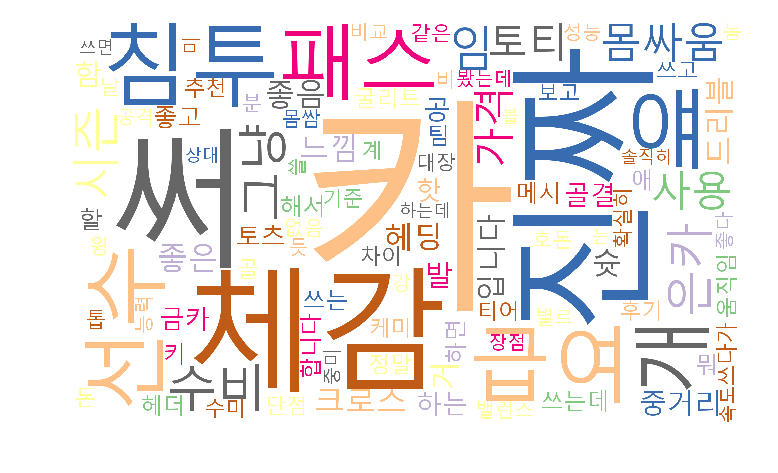

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',colormap = "Accent_r", 
                      width=2000, height=1200, max_words=100).generate_from_frequencies(words)
wordcloud.to_file('word_cloud.png')

plt.imshow(wordcloud)
plt.axis('off')
plt.show()




## 여러 포지션에 분포되어있는 선수들 파악

In [ ]:
name_position_extracted_df = extracted_df[['name','position']].sort_values(by='name')
name_position_extracted_df.head()

In [ ]:
name_position_extracted_df.shape

In [ ]:
position_duplicated_player_list = []      #여러 포지션으로 등록되어있는 선수 저장하기 위한 리스트


#선수 이름이 바뀌기 직전까지의 갯수만큼 반복
for i in range()



for row in name_position_extracted_df.iloc[]:  #행 한줄씩 내려가면서 같은 선수가 다른 포지션이 있는지 확인하기 위한 for문
    
    row

In [ ]:
name_position_extracted_df.iloc[1].position

In [ ]:
extracted_df['name'].value_counts()

In [ ]:
#추출된 353명의 선수 list 생성
extracted_player_list = []    #추출 선수 리스트 만들기

for i in new_name_count['name']:    #추출된 선수 list에 한명씩 추가
    extracted_player_list.append(i)  
print(extracted_player_list)



In [ ]:
from konlpy.tag import Okt

## 5가지 형태소 분석기
- Hannanum
- KKma
- Komoran
- Mecab
- Okt

### 각각의 형태소 분석기 시간 체크 및 비교

In [ ]:
#1. Hannanum
from konlpy.tag import Hannanum

start_time = timeit.default_timer()  #시작 시간 체크

hannanum = Hannanum()  #Hannanum 객체 생성

hannanum_list = []
for test in range(len(test_morpheme)):
    hannanum_result = hannanum.analyze(test_morpheme[test])
    hannanum_list.append(hannanum_result)

terminate_time = timeit.default_timer()  #종료 시간 체크

print('%f초 걸림.'%(terminate_time - start_time))


In [ ]:
hannanum_list[1]

In [ ]:
#2. KKma

from konlpy.tag import Kkma

start_time = timeit.default_timer()  #시작 시간 체크

kkma = Kkma()  #KKma 객체 생성

kkma_list = []
for test in range(len(test_morpheme)):
    kkma_result = kkma.morphs(test_morpheme[test])
    kkma_list.append(kkma_result)

terminate_time = timeit.default_timer()  #종료 시간 체크

print('%f초 걸림.'%(terminate_time - start_time))

In [ ]:
kkma_list[0]

In [ ]:
#3. Komoran

from konlpy.tag import Komoran

start_time = timeit.default_timer()  #시작 시간 체크

komoran = Komoran()   #Komoran 객체 생성

komoran_list = []
for test in range(len(test_morpheme)):
    komoran_result = komoran.pos(test_morpheme[test])
    komoran_list.append(komoran_result)

terminate_time = timeit.default_timer()  #종료 시간 체크

print('%f초 걸림.'%(terminate_time - start_time))

In [ ]:
komoran_list[0]

# mecab 포기


In [ ]:
#4. mecab

from konlpy.tag import Mecab

start_time = timeit.default_timer()  #시작 시간 체크

mecab = Mecab()   #Mecab 객체 생성

mecab_list = []
for test in range(len(test_morpheme)):
    mecab_result = mecab.pos(test_morpheme[test])
    mecab_list.append(mecab_result)

terminate_time = timeit.default_timer()  #종료 시간 체크4

print('%f초 걸림.'%(terminate_time - start_time))

In [ ]:
#5. Okt

from konlpy.tag import Okt

start_time = timeit.default_timer()  #시작 시간 체크

okt = Okt()   #okt 객체 생성

okt_list = []
for test in range(len(test_morpheme)):
    okt_result = okt.pos(test_morpheme[test])
    okt_list.append(okt_result)

terminate_time = timeit.default_timer()  #종료 시간 체크

print('%f초 걸림.'%(terminate_time - start_time))

## word2vec 방법론

### vectorize에는 bow(bag of words) / word2vec  2가지 방법이 있음
- bow는 count기반 & TF-IDF가 있음
- word2vec은 단어를 벡터화할 때 단어의 문맥적 의미를 보존해서 벡터화함.ex)cosine 유사도 활용
- gensim 패키지 활용해 word2vec 진행
- komoran 형태소 패키지 선택

In [ ]:
#3. Komoran

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

from konlpy.tag import Komoran

start_time = timeit.default_timer()  #시작 시간 체크

komoran = Komoran()   #Komoran 객체 생성

tokenized_data = []
#토크나이징 작업
for sentence in df['comment']:
    temp_X = komoran.morphs(sentence)
    temp_X = [word for word in temp_X if not word in stopwords]
    tokenized_data.append(temp_X)
    
terminate_time = timeit.default_timer()  #종료 시간 체크

print('%f초 걸림.'%(terminate_time - start_time))

In [ ]:
start_time = timeit.default_timer()  #시작 시간 체크
#임베딩 작업 => 벡터화
from gensim.models import Word2Vec
embedding_model = Word2Vec(sentences = tokenized_data, size=100, window = 2, min_count=20, workers=4, iter=20, sg=1)

terminate_time = timeit.default_timer()  #종료 시간 체크
print('%f초 걸림.'%(terminate_time - start_time))

In [ ]:
embedding_model.wv.vectors.shape

In [ ]:
import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))


plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
#단어벡터 구하기
word_vectors = embedding_model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]